In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [1]:
data_clean = pd.read_csv('C:\\Users\\Siva\\Desktop\\ExcelR\\Project3\\new\\data_clean.csv')

NameError: name 'pd' is not defined

In [360]:
data_clean

,Unnamed: 0,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married,Dclust
0,0,58138.0,7,66,0,1269,21,1,0,0,0,0
1,1,46344.0,5,69,2,18,4,1,0,0,0,0
2,2,71613.0,4,58,0,602,11,1,0,0,1,0
3,3,26646.0,6,39,1,35,4,1,0,0,1,0
4,4,58293.0,5,42,1,334,13,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2189,2190,61223.0,5,56,1,934,14,1,0,0,1,0
2190,2191,64014.0,7,77,3,436,17,0,1,0,1,0
2191,2192,56981.0,6,42,0,1173,6,1,0,0,0,0
2192,2193,69245.0,3,67,1,672,13,0,1,0,1,0


In [361]:
data_clean.drop(['Unnamed: 0', 'Dclust'], axis=1, inplace=True)

In [362]:
data_clean

,Income,NumWebVisitsMonth,CustomerAge,Children,MntTotalProducts,NumTotalPurchases,Education_Graduation,Education_PostGraduation,Education_UnderGraduation,Marital_Status_Married
0,58138.0,7,66,0,1269,21,1,0,0,0
1,46344.0,5,69,2,18,4,1,0,0,0
2,71613.0,4,58,0,602,11,1,0,0,1
3,26646.0,6,39,1,35,4,1,0,0,1
4,58293.0,5,42,1,334,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2189,61223.0,5,56,1,934,14,1,0,0,1
2190,64014.0,7,77,3,436,17,0,1,0,1
2191,56981.0,6,42,0,1173,6,1,0,0,0
2192,69245.0,3,67,1,672,13,0,1,0,1


In [363]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

Applying Standard Scalar

In [364]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data_clean))
data 

,0,1,2,3,4,5,6,7,8,9
0,0.310296,0.736569,1.018527,-1.267202,1.481842,2.340090,0.989120,-0.783093,-0.359419,-1.349093
1,-0.265031,-0.133435,1.275029,1.404823,-0.925615,-0.980461,0.989120,-0.783093,-0.359419,-1.349093
2,0.967623,-0.568437,0.334521,-1.267202,0.198250,0.386825,0.989120,-0.783093,-0.359419,0.741239
3,-1.225924,0.301567,-1.289994,0.068810,-0.892899,-0.980461,0.989120,-0.783093,-0.359419,0.741239
4,0.317857,-0.133435,-1.033491,0.068810,-0.317496,0.777478,-1.010999,1.276987,-0.359419,0.741239
...,...,...,...,...,...,...,...,...,...,...
2189,0.460786,-0.133435,0.163519,0.068810,0.837160,0.972804,0.989120,-0.783093,-0.359419,0.741239
2190,0.596934,0.736569,1.959035,2.740835,-0.121205,1.558784,-1.010999,1.276987,-0.359419,0.741239
2191,0.253856,0.301567,-1.033491,-1.267202,1.297097,-0.589808,0.989120,-0.783093,-0.359419,-1.349093
2192,0.852109,-1.003439,1.104028,0.068810,0.332960,0.777478,-1.010999,1.276987,-0.359419,0.741239


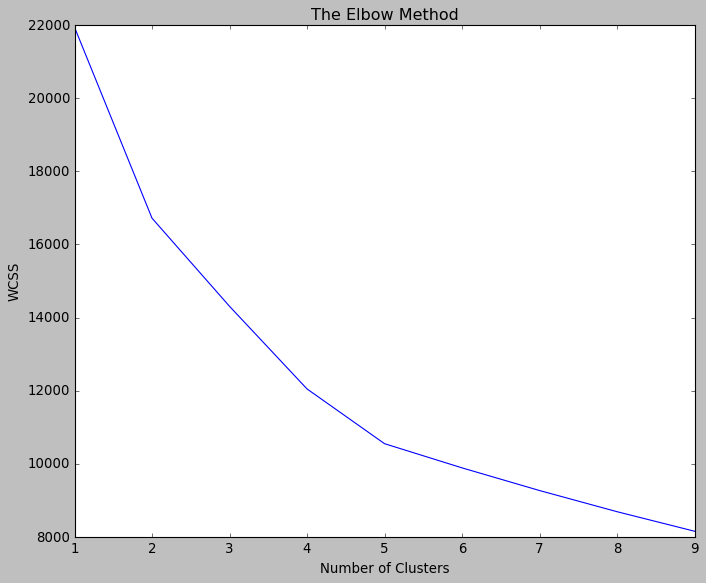

In [365]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 10):
    clf = KMeans(n_clusters=i)
    clf.fit(data)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 10), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [366]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

[0.22127067526385572, 0.21719899880399657, 0.25126690822547304, 0.25966093144751073, 0.2325576783535249, 0.2311364286510318, 0.23924337525375647, 0.2299510652722224, 0.22806697875442958, 0.2262041830253447]


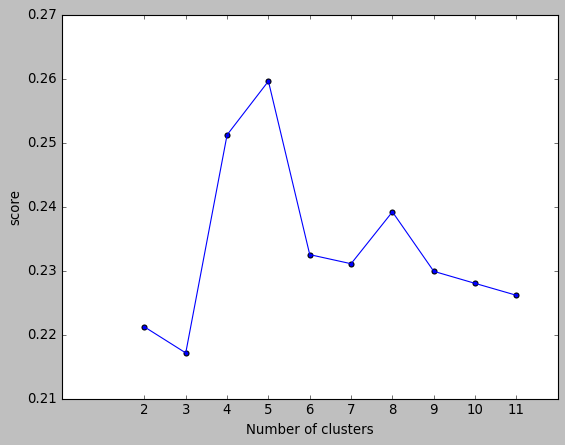

In [367]:
sil = []
sil2=[]
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i)
    label=kmeans.fit_predict(data)  #kdata.iloc[:,:8]
    sil.append(metrics.silhouette_score(data,label))
    sil2.append([i, metrics.silhouette_score(data,label), davies_bouldin_score(data, label),
                 calinski_harabasz_score(data,label)])

print(sil)    

plt.scatter(range(2, 12), sil)
plt.plot(range(2, 12), sil)
plt.xticks(range(2, 12))
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.show()

In [368]:
pd.DataFrame(sil2,
             columns=["K", "Silhouette_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Silhouette_Score"], ascending=False)

,K,Silhouette_Score,davies_bouldin_score,calinski_harabasz_score
3,5,0.259661,1.394570,590.579572
2,4,0.251267,1.357703,599.196244
6,8,0.239243,1.496470,475.947220
4,6,0.232558,1.472565,533.120030
5,7,0.231136,1.514196,498.057744
7,9,0.229951,1.514398,447.662644
8,10,0.228067,1.564743,437.768061
9,11,0.226204,1.537419,420.906468
0,2,0.221271,1.737970,684.655578
1,3,0.217199,1.595024,584.272636


In [369]:
clf = KMeans(n_clusters=2)
y_kmeans = clf.fit_predict(data)  

In [370]:
y_kmeans 

array([1, 0, 1, ..., 1, 1, 0])

In [371]:
clf.cluster_centers_

array([[-0.71324047,  0.50906183, -0.16054176,  0.41063096, -0.71914043,
        -0.58334406, -0.02788975, -0.04319372,  0.10967969,  0.01071939],
       [ 0.92534549, -0.66044775,  0.20828403, -0.53274529,  0.93299999,
         0.75682019,  0.03618366,  0.05603876, -0.14229648, -0.01390714]])

In [372]:
clf.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [373]:
clf.inertia_

16718.207727245775

In [374]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

0    1239
1     955
dtype: int64

In [375]:
import sklearn
sklearn.metrics.silhouette_score(data, y_kmeans)

0.22130338227181123

Text(0.5, 1.0, 'Clusters using KMeans')

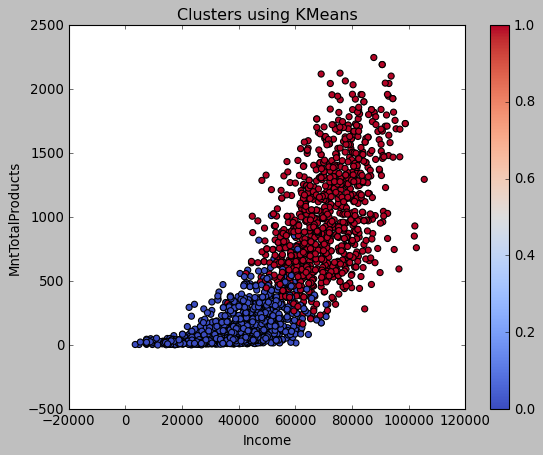

In [376]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [378]:
import plotly.express as px
fig = px.scatter_3d(data_clean, x="Income",y="MntTotalProducts", z="NumWebVisitsMonth", color=clf.labels_) 
fig.show()


In [427]:
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(data)  


In [428]:
y_kmeans

array([0, 2, 0, ..., 0, 1, 1])

In [429]:
clf.cluster_centers_

array([[ 1.03208775e+00, -8.23923123e-01,  1.34207844e-01,
        -6.96847817e-01,  1.05747769e+00,  7.48418839e-01,
         2.64626715e-01, -1.99448420e-01, -1.11497306e-01,
        -3.21568248e-02],
       [-2.62056901e-01,  3.26323170e-01,  2.01195174e-01,
         4.40286812e-01, -3.71987074e-01, -1.57230938e-01,
        -1.01099941e+00,  1.27698686e+00, -3.59418527e-01,
         2.75755042e-04],
       [-7.89874491e-01,  5.41195812e-01, -2.82230391e-01,
         3.32365971e-01, -7.30345168e-01, -5.97804883e-01,
         5.17628026e-01, -7.83093413e-01,  3.81178426e-01,
         3.06298217e-02]])

In [430]:
clf.labels_

array([0, 2, 0, ..., 0, 1, 1])

In [431]:
clf.inertia_

14308.570811715828

In [432]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

2    806
0    773
1    615
dtype: int64

In [433]:
sklearn.metrics.silhouette_score(data, y_kmeans)

0.21647346519307115

Text(0.5, 1.0, 'Clusters using KMeans')

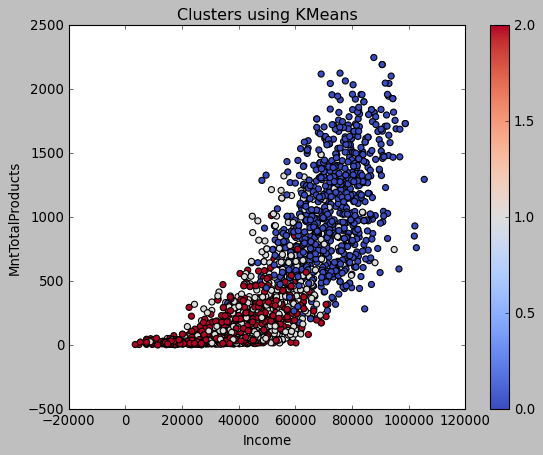

In [434]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [435]:
import plotly.express as px
fig = px.scatter_3d(data_clean, x="Income",y="MntTotalProducts", z="NumTotalPurchases", color=clf.labels_) 
fig.show()


In [388]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data)  


In [389]:
y_kmeans

array([2, 1, 2, ..., 2, 3, 3])

In [390]:
clf.cluster_centers_

array([[-0.56918029,  0.25842628, -0.46607728, -0.09681127, -0.46830111,
        -0.35251018, -1.01099941, -0.78309341,  2.78227171,  0.05885785],
       [-0.62426542,  0.48708249, -0.15283358,  0.38906022, -0.64887094,
        -0.45796227,  0.98912026, -0.78309341, -0.35941853,  0.00654875],
       [ 1.10623119, -0.91376147,  0.13168664, -0.78623795,  1.19381194,
         0.74472301,  0.30907957, -0.11119031, -0.3159182 , -0.02414413],
       [-0.25210315,  0.3218484 ,  0.21080582,  0.43395828, -0.35597533,
        -0.14043111, -1.01099941,  1.27698686, -0.35941853, -0.00482808]])

In [391]:
clf.labels_

array([2, 1, 2, ..., 2, 3, 3])

In [392]:
clf.inertia_

12049.55865901855

In [393]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

1    679
2    651
3    622
0    242
dtype: int64

In [394]:
sklearn.metrics.silhouette_score(data, y_kmeans)

0.25126690822547304

Text(0.5, 1.0, 'Clusters using KMeans')

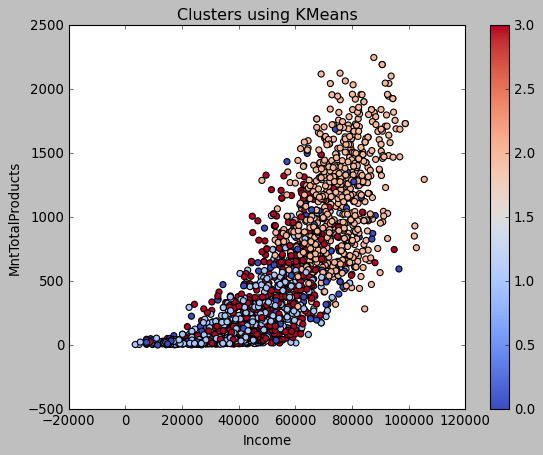

In [395]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [396]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data)  


In [397]:
y_kmeans

array([2, 1, 2, ..., 2, 3, 0])

In [398]:
clf.cluster_centers_

array([[-0.47944984,  0.41613537,  0.09948162,  0.53064166, -0.61586528,
        -0.42703557, -1.01099941,  1.27698686, -0.35941853,  0.00575178],
       [-0.74284924,  0.56199574, -0.19240581,  0.41380023, -0.72581942,
        -0.58177613,  0.98912026, -0.78309341, -0.35941853,  0.00549711],
       [ 0.94247668, -0.71256925,  0.1053241 , -0.53919562,  0.86857647,
         0.74160942,  0.98912026, -0.78309341, -0.35941853, -0.03064011],
       [ 0.97507821, -0.68673768,  0.35050673, -0.59730381,  1.17323084,
         0.77415776, -1.01099941,  1.24780725, -0.31491867, -0.01672844],
       [-0.53544092,  0.22553004, -0.43846173, -0.11584202, -0.44186408,
        -0.33969446, -1.01099941, -0.78309341,  2.78227171,  0.06145619]])

In [399]:
clf.labels_

array([2, 1, 2, ..., 2, 3, 0])

In [400]:
clf.inertia_

10552.252544528512

In [401]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

1    608
2    501
0    486
3    353
4    246
dtype: int64

In [402]:
sklearn.metrics.silhouette_score(data, y_kmeans)

0.25966093144751073

Text(0.5, 1.0, 'Clusters using KMeans')

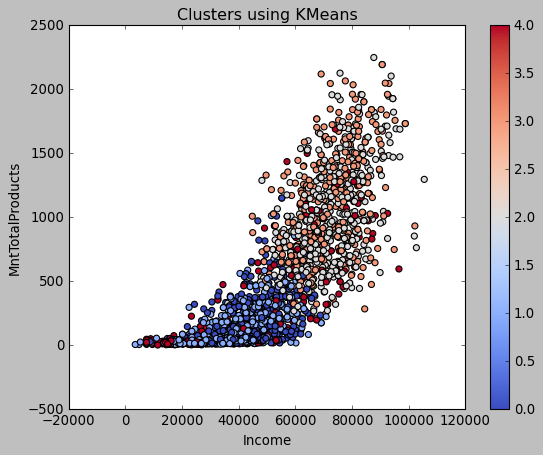

In [403]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [404]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(data) 

In [405]:
y_kmeans

array([1, 4, 3, ..., 3, 5, 2])

In [406]:
clf.cluster_centers_

array([[-0.56220437,  0.25323342, -0.45715296, -0.10162769, -0.46037087,
        -0.34866383, -1.01099941, -0.78309341,  2.78227171,  0.05306382],
       [ 0.34853811,  0.20446832,  0.24800212,  0.34714609,  0.22088501,
         0.82689071,  0.98912026, -0.78309341, -0.35941853,  0.01957673],
       [-0.47951175,  0.41547468,  0.09952588,  0.53159389, -0.61736928,
        -0.43233825, -1.01099941,  1.27698686, -0.35941853,  0.00854528],
       [ 1.20126696, -1.24203516,  0.02654644, -1.04825728,  1.11981847,
         0.54556839,  0.93560535, -0.78309341, -0.27535993, -0.03477056],
       [-0.91888226,  0.57231505, -0.31063748,  0.34876298, -0.8343562 ,
        -0.86375102,  0.98912026, -0.78309341, -0.35941853, -0.01336221],
       [ 0.96215611, -0.67687575,  0.34750511, -0.58579778,  1.15877028,
         0.77300036, -1.01099941,  1.27698686, -0.35941853, -0.01942626]])

In [407]:
clf.labels_

array([1, 4, 3, ..., 3, 5, 2])

In [408]:
clf.inertia_

9890.468652367159

In [409]:
km=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
km.value_counts()

2    485
4    482
5    349
1    336
3    299
0    243
dtype: int64

In [410]:
sklearn.metrics.silhouette_score(data, y_kmeans)

0.23234543919740713

Text(0.5, 1.0, 'Clusters using KMeans')

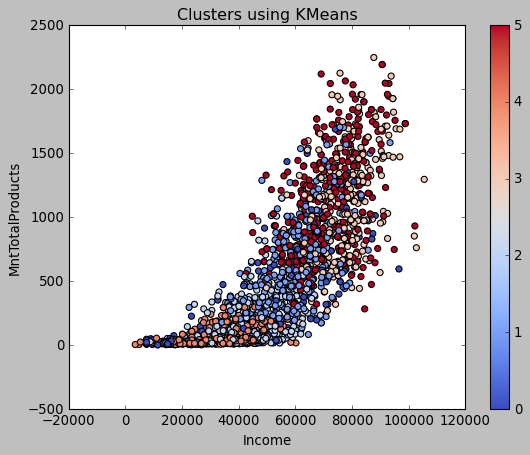

In [411]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [219]:

#data_clean['Kclust']=km # creating a  new column and assigning it to new column 
#data_clean 

In [220]:
#data_clean.groupby('Kclust')['Kclust'].value_counts()

In [221]:
#data_clean.groupby('Kclust')['Education'].value_counts()

In [222]:
#data_clean.groupby('Kclust')['Children','Kclust'].value_counts()

In [223]:
#data_clean.groupby('Kclust')['Income_Grp','Kclust'].value_counts()

We can observe clusters formed based on Income group high and low. Cluster '0' is having majority Low income group customers and Cluster '1' is having majority High income group customers.

In [224]:
#data_clean.groupby('Marital_Status')['Kclust'].value_counts()

In [225]:
plt.style.use(['classic']) 
print(plt.style.available)  

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [226]:
#data_clean.plot(x="Income",y ="MntTotalProducts",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
#plt.title('Clusters using KMeans')   

# DBScan

In [412]:
array = data_clean.values
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

array([[ 0.31029562,  0.73656888,  1.01852683, ..., -0.78309341,
        -0.35941853, -1.34909281],
       [-0.26503081, -0.13343495,  1.27502911, ..., -0.78309341,
        -0.35941853, -1.34909281],
       [ 0.96762338, -0.56843687,  0.33452075, ..., -0.78309341,
        -0.35941853,  0.74123885],
       ...,
       [ 0.25385568,  0.30156696, -1.03349141, ..., -0.78309341,
        -0.35941853, -1.34909281],
       [ 0.85210931, -1.00343879,  1.10402759, ...,  1.27698686,
        -0.35941853,  0.74123885],
       [ 0.05326705,  0.73656888,  1.27502911, ...,  1.27698686,
        -0.35941853,  0.74123885]])

In [413]:
from sklearn.neighbors import NearestNeighbors  

In [414]:
neigh = NearestNeighbors(n_neighbors=46)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

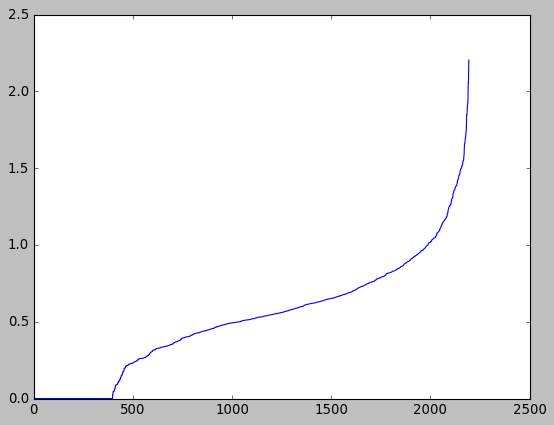

In [415]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

In [416]:
import numpy as np
eps=range(1,7,1)
min_samples=range(1,20)
silh = []

for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        label=dbscan.fit_predict(X)
        if(len(set(label))>1):
            silh.append( [i, j, metrics.silhouette_score(X,label), metrics.davies_bouldin_score(X,label),
                         metrics.calinski_harabasz_score(X,label)])



In [417]:
pd.DataFrame(silh, columns=["EPS", "n", "Sil_Score", "davies_bouldin_score", "calinski_harabasz_score"]).sort_values(["Sil_Score"], ascending=False)

,EPS,n,Sil_Score,davies_bouldin_score,calinski_harabasz_score
56,3,19,0.241353,1.500387,329.266340
47,3,10,0.241353,1.500387,329.266340
38,3,1,0.241353,1.500387,329.266340
39,3,2,0.241353,1.500387,329.266340
41,3,4,0.241353,1.500387,329.266340
42,3,5,0.241353,1.500387,329.266340
43,3,6,0.241353,1.500387,329.266340
44,3,7,0.241353,1.500387,329.266340
45,3,8,0.241353,1.500387,329.266340
46,3,9,0.241353,1.500387,329.266340


In [418]:
dbscan = DBSCAN(eps=3, min_samples=19)
dbscan.fit(X)  

DBSCAN(eps=3, min_samples=19)

In [419]:
dbscan.labels_  

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [420]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [421]:
cl.value_counts() 

cluster
0          1943
1           251
dtype: int64

In [422]:
metrics.silhouette_score(X, dbscan.labels_)

0.24135287149084136

In [423]:
import sklearn
print(sklearn.metrics.silhouette_score(X, dbscan.labels_  ))
print(metrics.davies_bouldin_score(X, dbscan.labels_ ))
print(metrics.calinski_harabasz_score(X, dbscan.labels_ ))

0.24135287149084136
1.500387239312074
329.2663398091786


In [424]:
#ds=pd.Series(dbscan.labels_)  # converting numpy array into pandas series object 
#data_clean['Dclust']=ds # creating a  new column and assigning it to new column 
#data_clean 

In [51]:
#data_clean.groupby('Dclust')['Dclust'].value_counts()

In [52]:
#sklearn.metrics.silhouette_score(data, dbscan.labels_)

Text(0.5, 1.0, 'Clusters using DBScan')

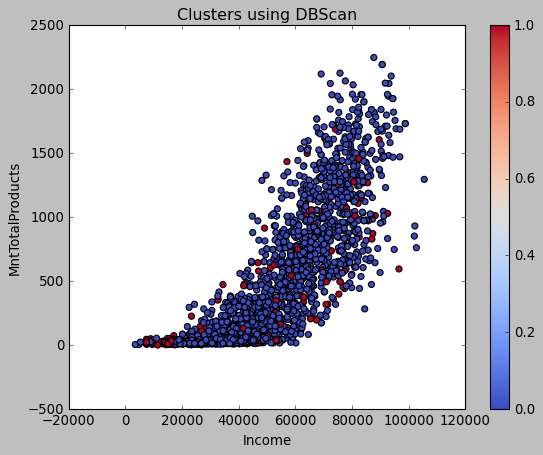

In [425]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=dbscan.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DBScan')

# Hierarchical Clustering

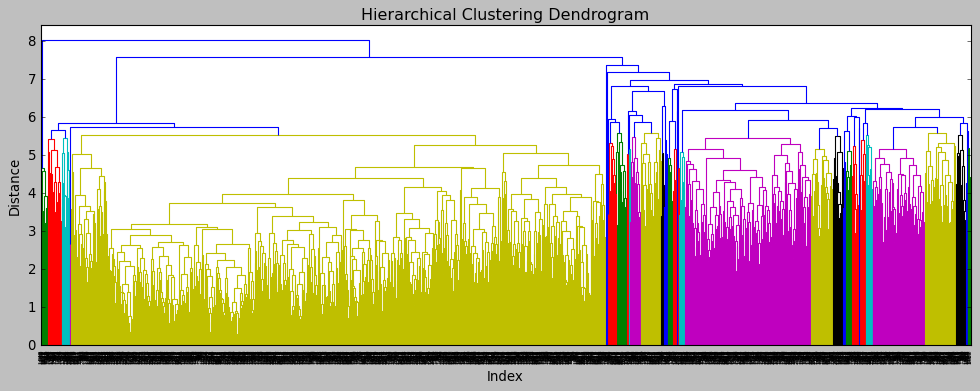

In [69]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

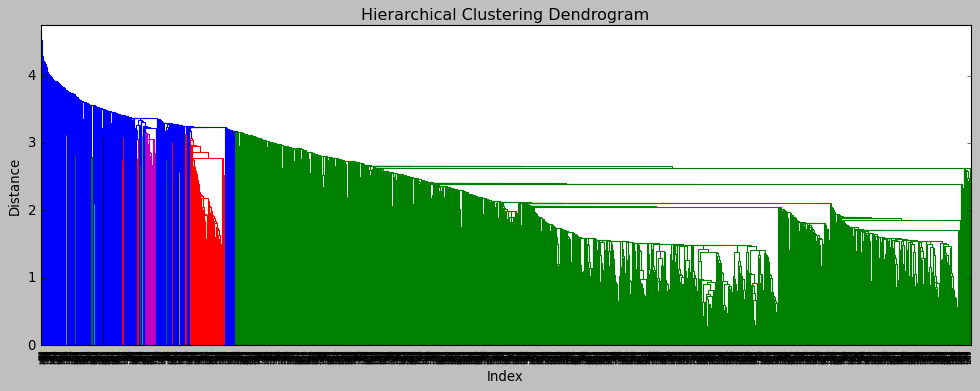

In [70]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show() 

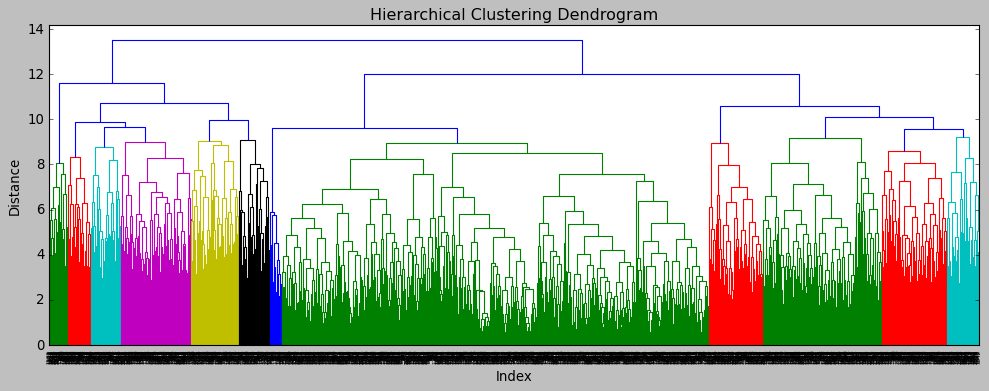

In [71]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [72]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       0
1       2
2       1
3       2
4       0
       ..
2061    0
2062    1
2063    1
2064    1
2065    2
Length: 2066, dtype: int64

In [73]:
cluster_labels.value_counts()

2    977
1    600
0    448
3     41
dtype: int64

Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

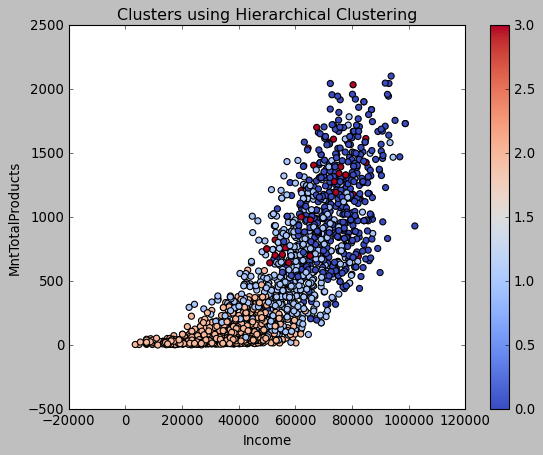

In [74]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 

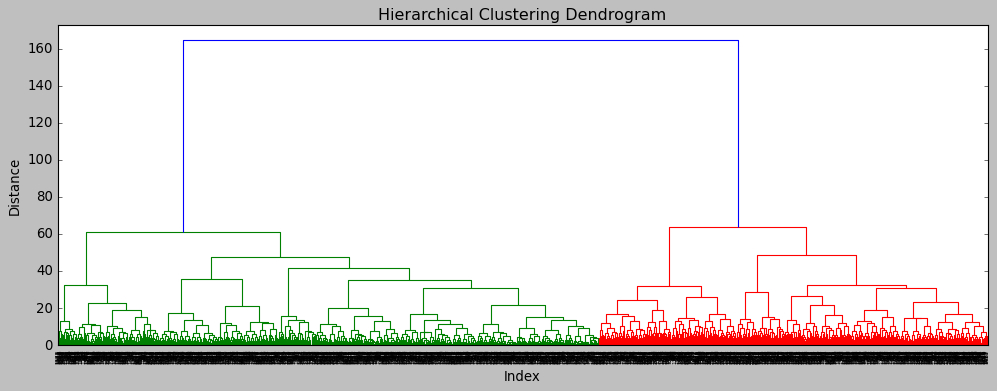

In [75]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(data, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [76]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels

0       0
1       1
2       0
3       1
4       0
       ..
2061    0
2062    0
2063    2
2064    0
2065    3
Length: 2066, dtype: int64

In [77]:
cluster_labels.value_counts()

1    976
0    559
2    304
3    227
dtype: int64

In [78]:
#data_clean['Hclust']=cluster_labels # creating a  new column and assigning it to new column 
#data_clean 

In [79]:
#data_clean.groupby('Hclust')['Income_Grp'].value_counts()

Text(0.5, 1.0, 'Clusters using Hierarchical Clustering')

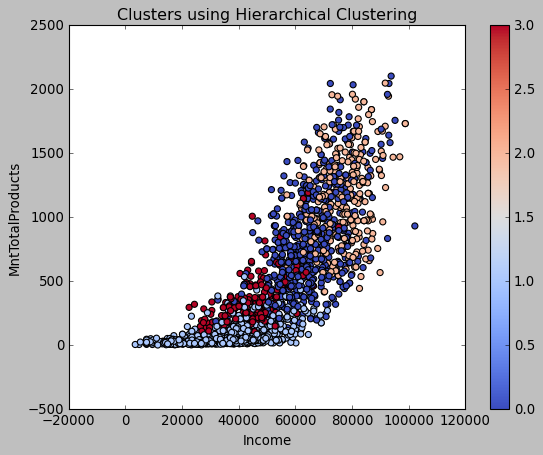

In [80]:
data_clean.plot(x="Income",y ="MntTotalProducts",c=h_complete.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 